In [2]:
import pandas as pd
import numpy as np
import prince
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [3]:
dat=pd.read_csv('/home/maria/Documents/DataScienceProjects/data/diamonds.csv')

In [4]:
len(dat)

219703

In [5]:
#drop index
dat=dat.drop(['Unnamed: 0'], axis=1)

In [6]:
dat

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,N,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,N,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,N,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


# Train-test split

In [7]:
# Assuming the total number of rows in your DataFrame is 219703
total_rows = len(dat)

# Number of test points
num_test_points = 20000

# Generate random indices for test points
test_indices = np.random.choice(total_rows, num_test_points, replace=False)

# Generate train indices by excluding the test indices
train_indices = np.setdiff1d(np.arange(total_rows), test_indices)

# Experiments with MCA dimensionality reduction

In [8]:
df=dat.copy()

# Specify the threshold for nunique
threshold = 15

# Extract categorical variables based on nunique
categorical_variables = [col for col in df.columns if df[col].nunique() <= threshold]

# Display the list of categorical variables
print("Categorical Variables:")
print(categorical_variables)

Categorical Variables:
['cut', 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition', 'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity']


In [9]:
categorical=df[categorical_variables]
target=df['total_sales_price']

In [10]:
print(categorical.iloc[test_indices])

            cut color clarity cut_quality  lab   symmetry     polish  \
11342     Round     H    VVS1   Excellent  GIA  Excellent  Excellent   
48920     Round     E     SI1   Excellent  GIA  Excellent  Excellent   
103577    Round     F    VVS1   Very Good  GIA  Very Good  Excellent   
115116    Round     H     SI1   Excellent  GIA  Excellent  Excellent   
153863    Round     D      I2   Excellent  GIA  Very Good  Very Good   
...         ...   ...     ...         ...  ...        ...        ...   
135390    Round     D     VS2   Excellent  GIA  Excellent  Excellent   
199537    Round     D     VS1   Excellent  GIA  Excellent  Excellent   
157515    Round     G    VVS2   Excellent  GIA  Very Good  Excellent   
33367     Round     M    VVS2   Excellent  IGI  Excellent  Excellent   
201016  Emerald     H    VVS1     unknown  GIA  Excellent  Excellent   

       eye_clean culet_size culet_condition girdle_min girdle_max fluor_color  \
11342    unknown          N         unknown          M

In [11]:
mca = prince.MCA(n_components=10)
categorical_mca = mca.fit_transform(categorical)

In [12]:
dir(mca)[50:]

['column_coordinates',
 'column_cosine_similarities',
 'copy',
 'cumulative_percentage_of_variance_',
 'eigenvalues_',
 'eigenvalues_summary',
 'engine',
 'fit',
 'fit_transform',
 'get_params',
 'n_components',
 'n_iter',
 'one_hot',
 'percentage_of_variance_',
 'plot',
 'random_state',
 'row_contributions_',
 'row_coordinates',
 'row_cosine_similarities',
 'row_masses_',
 'scree_plot',
 'set_output',
 'set_params',
 'svd_',
 'total_inertia_',
 'transform']

In [13]:
mca.percentage_of_variance_

array([4.33921309, 2.35483443, 2.15557374, 1.59786132, 1.42578403,
       1.33060245, 1.30020171, 1.27757312, 1.25241909, 1.19296588])

In [14]:
categorical_train=categorical_mca.iloc[train_indices]
categorical_test=categorical_mca.iloc[test_indices]
target_train=np.array(df['total_sales_price'].iloc[train_indices]).reshape(-1,1)
target_test=np.array(df['total_sales_price'].iloc[test_indices]).reshape(-1,1)

In [15]:
regr=Ridge()
regr.fit(categorical_train,target_train)
preds=regr.predict(categorical_test)

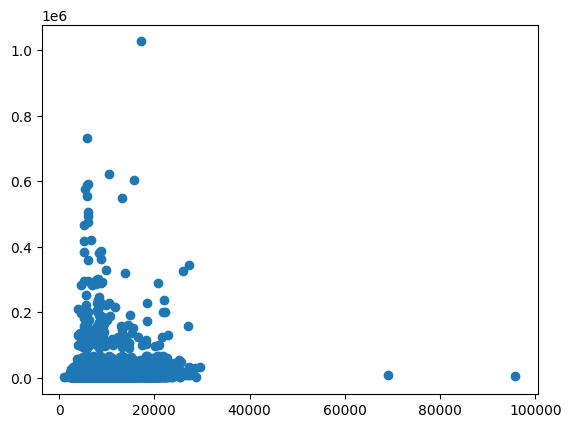

In [16]:
plt.scatter(preds,target_test)

In [17]:
r2_score(target_test,preds)

0.01614238393165479

# Linear Regression with OneHot Encoded data

In [51]:
#It's important to avoid the multi-collinearity trap
#https://towardsdatascience.com/one-hot-encoding-multicollinearity-and-the-dummy-variable-trap-b5840be3c41a

In [18]:
import pandas as pd

# Assuming df is your original DataFrame
df = dat.copy()

# Specify the threshold for nunique
threshold = 15

# Extract categorical variables based on nunique
categorical_variables = [col for col in df.columns if df[col].nunique() <= threshold]

# Display the list of categorical variables
print("Categorical Variables:")
print(categorical_variables)

# One-hot encode the categorical variables and construct a predictor matrix
one_hot_encoded_df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)

# Display the resulting DataFrame with one-hot encoded columns
print("One-Hot Encoded DataFrame:")
print(one_hot_encoded_df)

Categorical Variables:
['cut', 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition', 'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity']
One-Hot Encoded DataFrame:
        carat_weight  depth_percent  table_percent  meas_length  meas_width  \
0               0.09           62.7           59.0         2.85        2.87   
1               0.09           61.9           59.0         2.84        2.89   
2               0.09           61.1           59.0         2.88        2.90   
3               0.09           62.0           59.0         2.86        2.88   
4               0.09           64.9           58.5         2.79        2.83   
...              ...            ...            ...          ...         ...   
219698         10.65           61.3           58.0        14.06       14.18   
219699          5.17        

In [35]:
categorical_train = one_hot_encoded_df.drop('total_sales_price', axis=1).iloc[train_indices]
categorical_test = one_hot_encoded_df.drop('total_sales_price', axis=1).iloc[test_indices]
categorical_train = categorical_train.applymap(lambda x: int(x) if type(x) == bool else x)
categorical_test = categorical_test.applymap(lambda x: int(x) if type(x) == bool else x)

target_train = np.array(one_hot_encoded_df['total_sales_price'].iloc[train_indices]).reshape(-1, 1)
target_test = np.array(one_hot_encoded_df['total_sales_price'].iloc[test_indices]).reshape(-1, 1)

In [36]:
regr=Ridge(10)
regr.fit(categorical_train,target_train)
preds=regr.predict(categorical_test)

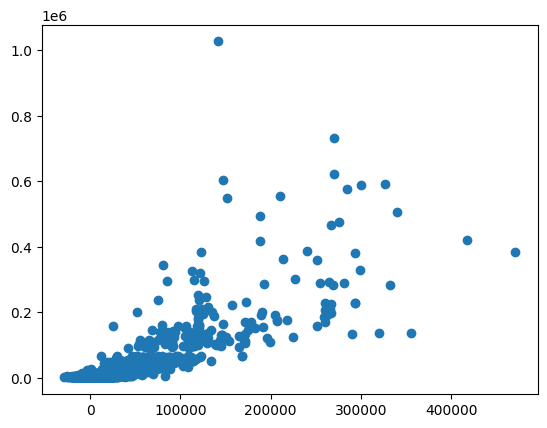

In [37]:
plt.scatter(preds,target_test)

In [30]:
r2_score(target_test,preds)

0.6693097008611633

In [34]:
categorical_train

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,cut_Cushion,cut_Cushion Modified,cut_Emerald,cut_Heart,...,fancy_color_overtone_unknown,fancy_color_intensity_Fancy,fancy_color_intensity_Fancy Dark,fancy_color_intensity_Fancy Deep,fancy_color_intensity_Fancy Intense,fancy_color_intensity_Fancy Light,fancy_color_intensity_Fancy Vivid,fancy_color_intensity_Light,fancy_color_intensity_Very Light,fancy_color_intensity_unknown
0,0.09,62.7,59.0,2.85,2.87,1.79,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,0.09,61.9,59.0,2.84,2.89,1.78,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,0.09,61.1,59.0,2.88,2.90,1.77,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.09,62.0,59.0,2.86,2.88,1.78,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,0.09,64.9,58.5,2.79,2.83,1.82,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,10.65,61.3,58.0,14.06,14.18,8.66,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
219699,5.17,64.8,65.0,11.55,8.81,5.71,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
219700,18.07,60.2,59.0,17.06,17.10,10.20,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
219701,0.90,70.8,72.0,5.22,4.90,3.47,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


# Neural Network Regression

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Assuming you have your training data as torch tensors
# Convert categorical_train and target_train to torch tensors
categorical_train_tensor = torch.tensor(categorical_train.values, dtype=torch.float32)
target_train_tensor = torch.tensor(target_train, dtype=torch.float32)

categorical_test_tensor = torch.tensor(categorical_test.values, dtype=torch.float32)
target_test_tensor = torch.tensor(target_test, dtype=torch.float32)

# Define the neural network model
class MLPRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2=nn.ReLU()
        self.fc3=nn.Linear(hidden_size,output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x=self.relu2(x)
        x=self.fc3(x)
        return x

# Instantiate the model, define the loss function, and choose an optimizer
input_size = categorical_train_tensor.shape[1]
hidden_size = 64  # You can adjust this based on your problem
output_size = 1  # Assuming a single output for regression
model = MLPRegressor(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Create a DataLoader for training data
train_dataset = TensorDataset(categorical_train_tensor, target_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Calculate R2 on the test set
    model.eval()
    with torch.no_grad():
        test_predictions = model(categorical_test_tensor)
    
    r2_value = r2_score(target_test_tensor.numpy(), test_predictions.numpy())
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, R2 on Test Set: {r2_value:.4f}')


# Make predictions
model.eval()
with torch.no_grad():
    predictions = model(categorical_test_tensor)

# Calculate MSE on test set
mse = criterion(predictions, target_test_tensor)
print(f'Mean Squared Error on Test Set: {mse.item():.4f}')


Epoch 1/100, Loss: 42739788.0000, R2 on Test Set: 0.4465
Epoch 2/100, Loss: 33361218.0000, R2 on Test Set: 0.6456
Epoch 3/100, Loss: 14812630.0000, R2 on Test Set: 0.7097
Epoch 4/100, Loss: 1767401.8750, R2 on Test Set: 0.7372
Epoch 5/100, Loss: 17608174.0000, R2 on Test Set: 0.7520
Epoch 6/100, Loss: 6565671.0000, R2 on Test Set: 0.7638
Epoch 7/100, Loss: 143070080.0000, R2 on Test Set: 0.7693
Epoch 8/100, Loss: 72964832.0000, R2 on Test Set: 0.7776
Epoch 9/100, Loss: 14422372.0000, R2 on Test Set: 0.7842
Epoch 10/100, Loss: 4918033.5000, R2 on Test Set: 0.7862
Epoch 11/100, Loss: 2080168.1250, R2 on Test Set: 0.7929
Epoch 12/100, Loss: 33625432.0000, R2 on Test Set: 0.7985
Epoch 13/100, Loss: 4275676.0000, R2 on Test Set: 0.8042
Epoch 14/100, Loss: 330789120.0000, R2 on Test Set: 0.8037
Epoch 15/100, Loss: 3162518.0000, R2 on Test Set: 0.8116
Epoch 16/100, Loss: 24232022.0000, R2 on Test Set: 0.8137
Epoch 17/100, Loss: 2649016.2500, R2 on Test Set: 0.8132
Epoch 18/100, Loss: 1583713.

In [52]:
preds=np.array(predictions)

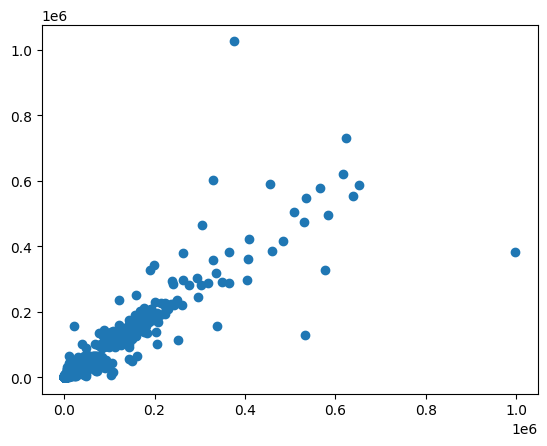

In [53]:
plt.scatter(preds,target_test)

In [54]:
r2_score(target_test,preds)

0.8636240441911922

# Conclusion

In this notebook I experimented with different encodings of categorical data that was prevalent in the dataset. MCA (an algorithm developed specifically for transforming categorical data) performed poorly for this data as the features it extracted explained only 1% of the variance in the target. Careful one-hot encoding of the data (avoiding of the multicollinearity trap) with Ridge regression performed fairly well, explaining 66% of the variance. Neural network regression (with three layers) performed remarkably well on the one-hot encoded data reaching 0.86-0.87 variance explained (perhaps would be even better if trained for a very long time or with more layers, maybe could hit 90%).  